In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential,load_model
import keras

In [3]:
train_images = pd.read_csv("emnist-balanced-train.csv",header=None)
test_images = pd.read_csv("emnist-balanced-test.csv",header=None)
map_images = pd.read_csv("emnist-balanced-mapping.txt",header=None) 
#The 1st row would be treated as header if not set header to none.

In [4]:
train_images

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112795,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112796,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112797,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112798,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


a


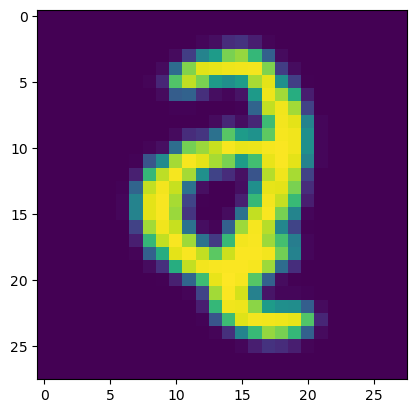

In [5]:
plt.imshow(np.rot90(np.fliplr(train_images.iloc[1,1:].values.reshape(28,28)))) ## We'll learn about this later
print(chr(97)) # 36 in labels column maps to 36 --> 97 in map_images 

# Data Preprocessing

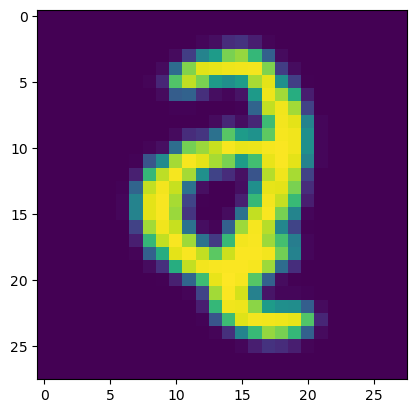

In [6]:
# Seperating labels from features in training and test data.
train_x = train_images.iloc[:,1:]  
train_y = train_images.iloc[:,0]  
train_x = train_x.values

test_x = test_images.iloc[:,1:]
test_y = test_images.iloc[:,0]
test_x = test_x.values

# ascii_map just for the convenince, i've removed the first column in map_images.
ascii_map = []
for i in map_images.values:
    ascii_map.append(i[0].split()[1])

# Uncomment the below line to know about the labels present in our dataset
# for i in ascii_map: 
#     print(chr(int(i)))
plt.imshow(np.rot90(np.fliplr(train_x[1].reshape(28,28))))

In [7]:
# The images in train_images are not in a proper orientation,hence to make them appropriate for training & testing data.

def rot_flip(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

(112800, 28, 28)

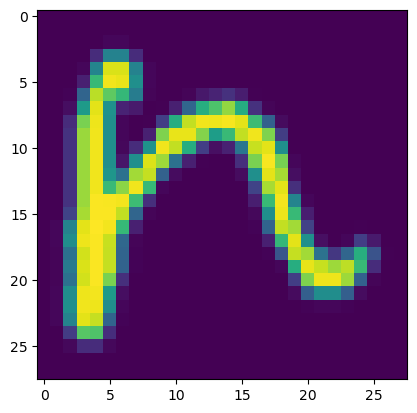

In [8]:
train_x = np.apply_along_axis(rot_flip,1,train_x)
test_x = np.apply_along_axis(rot_flip,1,test_x)
plt.imshow(train_x[2])
train_x.shape

In [9]:
train_x = train_x.astype('float32')
train_x = train_x/255.0

test_x = test_x.astype('float32')
test_x = test_x/255.0

train_x = train_x.reshape(-1, 28,28, 1)   #Equivalent to (112800,28,28,1)
test_x = test_x.reshape(-1, 28,28, 1)  

In [45]:
model = Sequential()
model.add(Conv2D(32,(4,4),input_shape = (28,28,1),activation = 'relu'))
model.add(Conv2D(64,(4,4),activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(4,4),activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(47,activation='softmax'))

In [46]:
model.compile(optimizer = 'adam',loss= "sparse_categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_69 (Conv2D)          (None, 25, 25, 32)        544       
                                                                 
 conv2d_70 (Conv2D)          (None, 22, 22, 64)        32832     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_71 (Conv2D)          (None, 8, 8, 128)         131200    
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 4, 4, 128)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 4, 4, 128)       

In [47]:
history = model.fit(
    train_x,
    train_y,
    validation_data = (test_x,test_y),
    epochs = 30,
)

Epoch 1/30
3525/3525 [==============================] - 560s 158ms/step - loss: 0.7662 - accuracy: 0.7594 - val_loss: 0.3924 - val_accuracy: 0.8653
Epoch 2/30
3525/3525 [==============================] - 557s 158ms/step - loss: 0.4498 - accuracy: 0.8455 - val_loss: 0.3504 - val_accuracy: 0.8745
Epoch 3/30
3525/3525 [==============================] - 557s 158ms/step - loss: 0.4013 - accuracy: 0.8586 - val_loss: 0.3406 - val_accuracy: 0.8799
Epoch 4/30
3525/3525 [==============================] - 603s 171ms/step - loss: 0.3719 - accuracy: 0.8683 - val_loss: 0.3276 - val_accuracy: 0.8797
Epoch 5/30
3525/3525 [==============================] - 549s 156ms/step - loss: 0.3522 - accuracy: 0.8732 - val_loss: 0.3262 - val_accuracy: 0.8868
Epoch 6/30
3525/3525 [==============================] - 546s 155ms/step - loss: 0.3375 - accuracy: 0.8768 - val_loss: 0.3243 - val_accuracy: 0.8874
Epoch 7/30
3525/3525 [==============================] - 556s 158ms/step - loss: 0.3236 - accuracy: 0.8797 - val_

In [48]:
# plot accuracy and loss
def plotgraph(epochs, acc, val_acc,title):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel(title)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

In [49]:
#%%
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

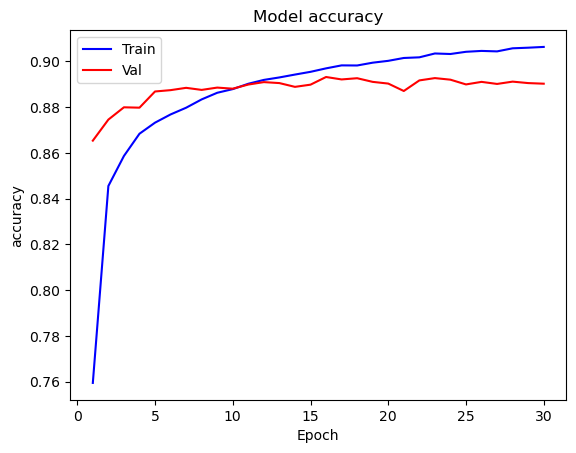

In [50]:
# Accuracy curve
plotgraph(epochs, acc, val_acc,"accuracy")

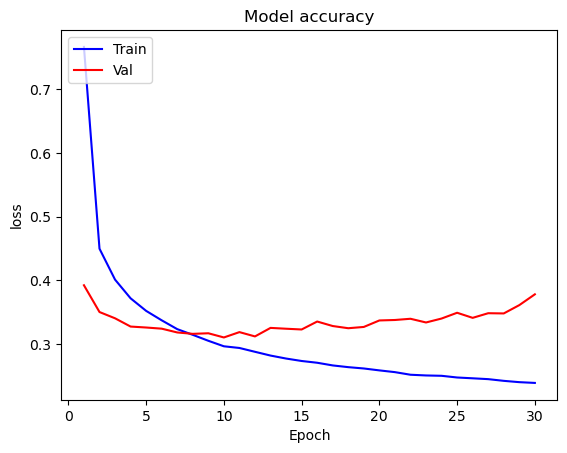

In [51]:
# loss curve
plotgraph(epochs, loss, val_loss,"loss")

In [52]:
score = model.evaluate(test_x, test_y, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.37821298837661743
Test accuracy: 0.8902127742767334


In [53]:
ascii_map = []
for i in map_images.values:
    ascii_map.append(i[0].split()[1])


# Adding character to associated ASCII Value
character = []
for i in ascii_map:
    character.append(chr(int(i)))
# plt.imshow(np.rot90(np.fliplr(train_x[1].reshape(28,28))))
character = pd.DataFrame(character)

In [54]:
ascii_map = pd.DataFrame(ascii_map)
ascii_map["Character"] = character
ascii_map.to_csv("mapping.csv",index=False,header=True)

(28, 28, 3)
1/1 [==============================] - 0s 391ms/step
Prediction :  4


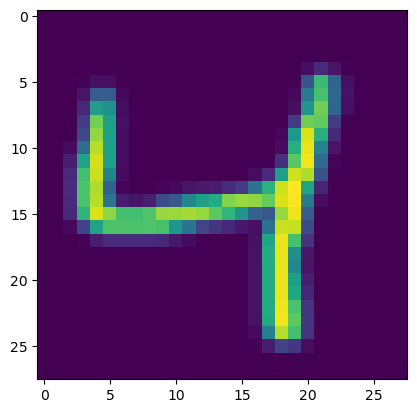

In [55]:
from keras.preprocessing import image
import cv2

img_sh_lst = []
img = tf.keras.utils.load_img("No.png",target_size=(28,28))
x = tf.keras.utils.img_to_array(img)
print(x.shape)
x = x/255.0

gray_image = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
gray_image = np.expand_dims(gray_image, axis=-1)
plt.imshow(gray_image)
gray_image = np.expand_dims(gray_image, axis=0)
cl = model.predict(gray_image)
cl = list(cl[0])

print("Prediction : ",ascii_map["Character"][cl.index(max(cl))])